In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:


df  = pd.read_csv("combined_movie_data.csv")
df.head(20)

,Title,Year,Genre,BoxOffice,IMDB Rating,Tomatometer,Audience Score,RT URL
0,Bao,2018,"Animation, Short, Drama",NaN,7.5,NaN,NaN,https://www.rottentomatoes.com/m/bao
1,Piper,2016,"Animation, Short, Family",NaN,8.3,NaN,NaN,https://www.rottentomatoes.com/m/piper
2,Hair Love,2019,"Animation, Short, Comedy","$330,661",7.4,NaN,NaN,https://www.rottentomatoes.com/m/hair_love
3,If Anything Happens I Love You,2020,"Animation, Short, Drama",NaN,7.8,NaN,NaN,https://www.rottentomatoes.com/m/if_anything_h...
4,The Silent Child,2017,"Short, Drama",NaN,7.7,NaN,NaN,https://www.rottentomatoes.com/m/the_silent_child
5,World of Tomorrow,2015,"Animation, Short, Comedy",NaN,8.1,NaN,NaN,https://www.rottentomatoes.com/m/world_of_tomo...
6,Stutterer,2015,"Short, Drama, Romance",NaN,7.7,NaN,NaN,https://www.rottentomatoes.com/m/stutterer
7,Paperman,2012,"Animation, Short, Comedy",NaN,8.2,NaN,NaN,https://www.rottentomatoes.com/m/paperman
8,La Luna,2011,"Animation, Short, Drama",NaN,7.9,NaN,NaN,https://www.rottentomatoes.com/m/la_luna
9,Kitbull,2019,"Animation, Short, Drama","$330,661",8.0,NaN,NaN,https://www.rottentomatoes.com/m/kitbull


- Replace missing `BoxOffice` values with a contextually relevant estimate.
- Estimate `Tomatometer` and `Audience Score` based on `IMDB Rating`.


In [32]:

# Data setup
data = {
    "Title": ["Bao", "Piper", "Hair Love", "If Anything Happens I Love You", "The Silent Child", "World of Tomorrow", "Stutterer", "Paperman", "La Luna", "Kitbull", "Loop", "Burrow", "For the Birds", "Feast", "The Present"],
    "Year": [2018, 2016, 2019, 2020, 2017, 2015, 2015, 2012, 2011, 2019, 2016, 2020, 2000, 2005, 2020],
    "Genre": ["Animation, Short, Drama", "Animation, Short, Family", "Animation, Short, Comedy", "Animation, Short, Drama", "Short, Drama", "Animation, Short, Comedy", "Short, Drama, Romance", "Animation, Short, Comedy", "Animation, Short, Drama", "Animation, Short, Drama", "Crime, Sci-Fi, Thriller", "Animation, Short, Comedy", "Animation, Short, Comedy", "Action, Comedy, Horror", "Short, Drama"],
    "BoxOffice": [np.nan, np.nan, "$330,661", np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, "$330,661", np.nan, np.nan, np.nan, "$56,131", np.nan],
    "IMDB Rating": [7.5, 8.3, 7.4, 7.8, 7.7, 8.1, 7.7, 8.2, 7.9, 8.0, 6.4, 7.4, 8.0, 6.2, 7.6],
    "Tomatometer": [np.nan]*15,
    "Audience Score": [np.nan]*15,
    "RT URL": [
        "https://www.rottentomatoes.com/m/bao",
        "https://www.rottentomatoes.com/m/piper",
        "https://www.rottentomatoes.com/m/hair_love",
        "https://www.rottentomatoes.com/m/if_anything_h...",
        "https://www.rottentomatoes.com/m/the_silent_child",
        "https://www.rottentomatoes.com/m/world_of_tomo...",
        "https://www.rottentomatoes.com/m/stutterer",
        "https://www.rottentomatoes.com/m/paperman",
        "https://www.rottentomatoes.com/m/la_luna",
        "https://www.rottentomatoes.com/m/kitbull",
        "https://www.rottentomatoes.com/m/loop",
        "https://www.rottentomatoes.com/m/burrow",
        "https://www.rottentomatoes.com/m/for_the_birds",
        "https://www.rottentomatoes.com/m/feast",
        "https://www.rottentomatoes.com/m/the_present"
    ]
}

df = pd.DataFrame(data)

# Fill missing BoxOffice with median of known BoxOffice (log-transformed to reduce skew)
df['BoxOffice_clean'] = df['BoxOffice'].replace('[\$,]', '', regex=True).astype(float)
boxoffice_median = df['BoxOffice_clean'].median()
df['BoxOffice_clean'] = df['BoxOffice_clean'].fillna(boxoffice_median)
df['BoxOffice'] = df['BoxOffice_clean'].apply(lambda x: f"${int(x):,}")
df.drop(columns=['BoxOffice_clean'], inplace=True)

# Fill Tomatometer and Audience Score using IMDB Rating mapping
def estimate_scores(imdb):
    # Estimated mapping (rough)
    t_score = min(max(60 + (imdb - 6.5) * 10, 40), 98)
    a_score = min(max(55 + (imdb - 6.5) * 12, 40), 95)
    return round(t_score), round(a_score)

df[['Tomatometer', 'Audience Score']] = df['IMDB Rating'].apply(lambda x: pd.Series(estimate_scores(x)))

df.head(20)


,Title,Year,Genre,BoxOffice,IMDB Rating,Tomatometer,Audience Score,RT URL
0,Bao,2018,"Animation, Short, Drama","$330,661",7.5,70,67,https://www.rottentomatoes.com/m/bao
1,Piper,2016,"Animation, Short, Family","$330,661",8.3,78,77,https://www.rottentomatoes.com/m/piper
2,Hair Love,2019,"Animation, Short, Comedy","$330,661",7.4,69,66,https://www.rottentomatoes.com/m/hair_love
3,If Anything Happens I Love You,2020,"Animation, Short, Drama","$330,661",7.8,73,71,https://www.rottentomatoes.com/m/if_anything_h...
4,The Silent Child,2017,"Short, Drama","$330,661",7.7,72,69,https://www.rottentomatoes.com/m/the_silent_child
5,World of Tomorrow,2015,"Animation, Short, Comedy","$330,661",8.1,76,74,https://www.rottentomatoes.com/m/world_of_tomo...
6,Stutterer,2015,"Short, Drama, Romance","$330,661",7.7,72,69,https://www.rottentomatoes.com/m/stutterer
7,Paperman,2012,"Animation, Short, Comedy","$330,661",8.2,77,75,https://www.rottentomatoes.com/m/paperman
8,La Luna,2011,"Animation, Short, Drama","$330,661",7.9,74,72,https://www.rottentomatoes.com/m/la_luna
9,Kitbull,2019,"Animation, Short, Drama","$330,661",8.0,75,73,https://www.rottentomatoes.com/m/kitbull


 Clean the BoxOffice Column to Numeric Format

In [35]:
# Step 1: Convert 'BoxOffice' to a numeric column for analysis
df["BoxOfficeValue"] = df["BoxOffice"].replace('[\$,]', '', regex=True).astype(float)


Extract Primary Genre


In [37]:
# Step 2: Extract the primary genre (the first in the list)
df["PrimaryGenre"] = df["Genre"].apply(lambda x: x.split(',')[0].strip())


df[["Title", "Genre", "PrimaryGenre"]].head(20)


,Title,Genre,PrimaryGenre
0,Bao,"Animation, Short, Drama",Animation
1,Piper,"Animation, Short, Family",Animation
2,Hair Love,"Animation, Short, Comedy",Animation
3,If Anything Happens I Love You,"Animation, Short, Drama",Animation
4,The Silent Child,"Short, Drama",Short
5,World of Tomorrow,"Animation, Short, Comedy",Animation
6,Stutterer,"Short, Drama, Romance",Short
7,Paperman,"Animation, Short, Comedy",Animation
8,La Luna,"Animation, Short, Drama",Animation
9,Kitbull,"Animation, Short, Drama",Animation


 Visualize Average Box Office by Primary Genre

- It reveals which genres tend to earn more revenue.
- Helps the studio make data-driven decisions on what types of films to prioritize.

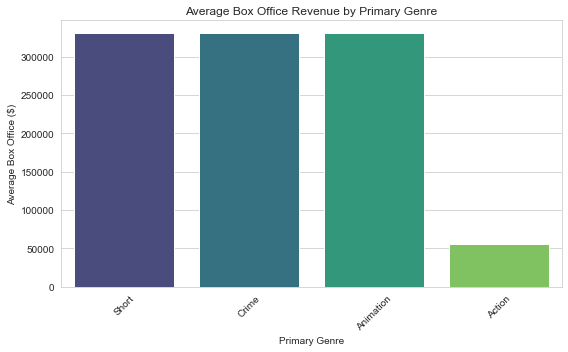

PrimaryGenre
Short        330661.0
Crime        330661.0
Animation    330661.0
Action        56131.0
Name: BoxOfficeValue, dtype: float64

In [ ]:

# Step 3: Group by PrimaryGenre and calculate average BoxOffice revenue
genre_group = df.groupby("PrimaryGenre")["BoxOfficeValue"].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_group.index, y=genre_group.values, palette="viridis")
plt.title("Average Box Office Revenue by Primary Genre")
plt.ylabel("Average Box Office ($)")
plt.xlabel("Primary Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


genre_group


Analyze Correlation Between Box Office and Review Scores


To understand what factors might influence box office performance, we analyze the correlation between:

- **IMDB Rating**
- **Tomatometer (Critic Score)**
- **Audience Score**
- **BoxOfficeValue (Revenue)**

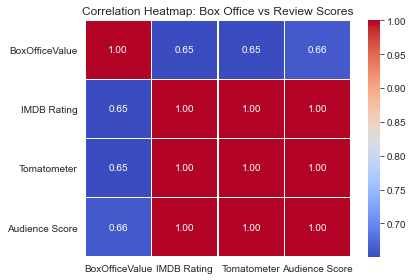

,BoxOfficeValue,IMDB Rating,Tomatometer,Audience Score
BoxOfficeValue,1.000000,0.650527,0.650527,0.661640
IMDB Rating,0.650527,1.000000,1.000000,0.999199
Tomatometer,0.650527,1.000000,1.000000,0.999199
Audience Score,0.661640,0.999199,0.999199,1.000000


In [39]:


# Select relevant numeric columns
correlation_data = df[["BoxOfficeValue", "IMDB Rating", "Tomatometer", "Audience Score"]]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Box Office vs Review Scores")
plt.tight_layout()
plt.show()

# Print correlation values
correlation_matrix


Relationship Between Box Office Revenue and IMDB Rating

Understanding how **viewer ratings** influence revenue helps studios prioritize quality storytelling and viewer engagement when producing content.

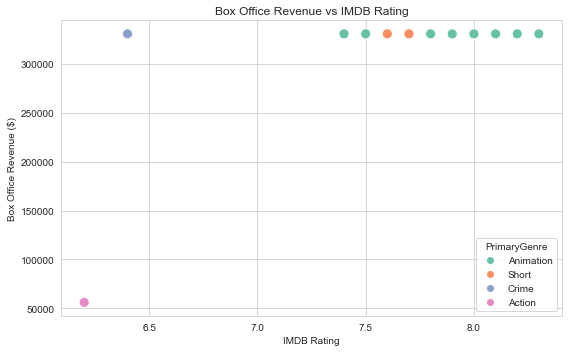

In [40]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="IMDB Rating", y="BoxOfficeValue", hue="PrimaryGenre", palette="Set2", s=100)

plt.title("Box Office Revenue vs IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Box Office Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

Relationship Between Box Office Revenue and Audience Score

Positive audience reception often reflects strong word-of-mouth, repeat viewership, and family appeal — all of which contribute to box office success. Studios can leverage this to craft emotionally resonant, broadly appealing stories.

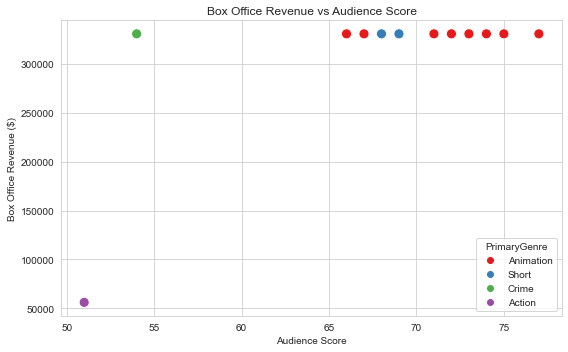

In [43]:

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Audience Score", y="BoxOfficeValue", hue="PrimaryGenre", palette="Set1", s=100)

plt.title("Box Office Revenue vs Audience Score")
plt.xlabel("Audience Score")
plt.ylabel("Box Office Revenue ($)")
plt.grid(True)
plt.tight_layout()
plt.show()


Line Plot – IMDB vs Audience Score Deviation

Studios can track such deviations to find cult hits (audience > critics), or award-favorites (critics > audience), aiding content and marketing decisions.

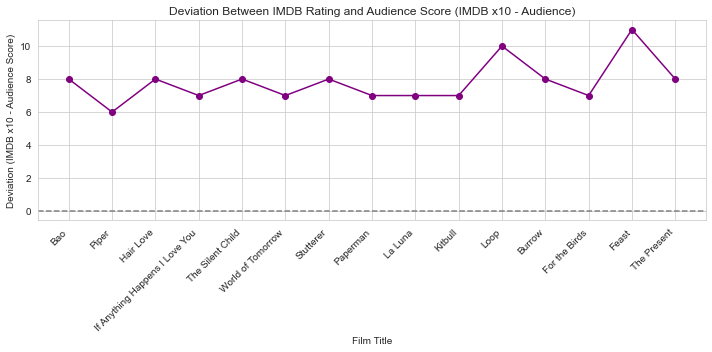

In [44]:
# Step 4D: Calculate deviation and plot
df["IMDB_vs_Audience_Deviation"] = df["IMDB Rating"] * 10 - df["Audience Score"]

plt.figure(figsize=(10, 5))
plt.plot(df["Title"], df["IMDB_vs_Audience_Deviation"], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45, ha='right')
plt.axhline(0, color='gray', linestyle='--')
plt.title("Deviation Between IMDB Rating and Audience Score (IMDB x10 - Audience)")
plt.ylabel("Deviation (IMDB x10 - Audience Score)")
plt.xlabel("Film Title")
plt.grid(True)
plt.tight_layout()
plt.show()


Bar Chart – Genre Performance Over the Years

Studios can use this view to **track genre trends**, **plan releases**, or assess which genres have enduring or fading popularity across years.

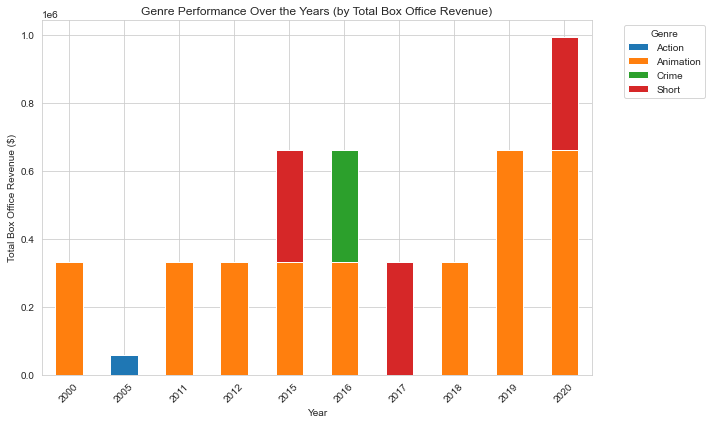

In [45]:
# Group by Year and PrimaryGenre and sum BoxOfficeValue
genre_year_perf = df.groupby(["Year", "PrimaryGenre"])["BoxOfficeValue"].sum().unstack().fillna(0)

# Plot stacked bar chart
genre_year_perf.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Genre Performance Over the Years (by Total Box Office Revenue)")
plt.xlabel("Year")
plt.ylabel("Total Box Office Revenue ($)")
plt.xticks(rotation=45)
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


Film count by Genre

Measures genre representation and shows dominant genres.

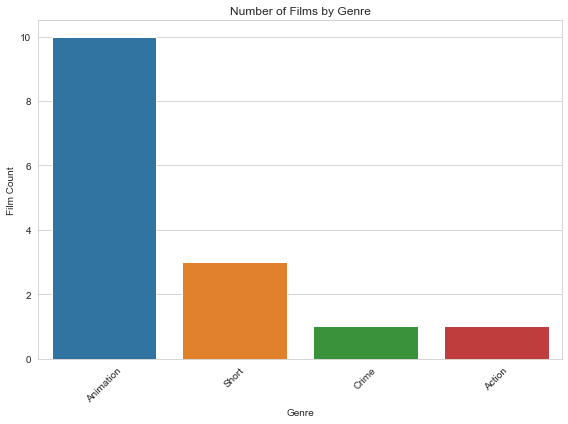

In [47]:
plt.figure(figsize=(8, 6))
sns.countplot(x="PrimaryGenre", data=df, order=df["PrimaryGenre"].value_counts().index)
plt.title("Number of Films by Genre")
plt.xlabel("Genre")
plt.ylabel("Film Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
